## Домашка 1
#### *«Великаны — как луковицы. Лук многослоен! Я тоже! Слой за слоем. Ты усёк? Мы многослойные!» — Шрек*

Эта домашка про декомпозицию и срезы. За неё можно получить максимум 6 баллов. На решение отводится **14 календарных дней** с момента выдачи. Обратите внимание, что **дедлайны на курсе сразу жёсткие**, а значит отправка решений после них запрещена.
Задание выполняется самостоятельно, списывания не допускаются. При обнаружении одинаковых работ балл за задание анулируется у всех студентов, вне зависимости от того, кто у кого списал.

#### **Как сдать домашку?**
1. Скачайте этот ноутбук.
2. Решите задания (локально или в Google Colab).
3. Опубликуйте решенный ноутбук в свой GitHub репозиторий (проверьте, чтобы он был публичным).
4. Приложите ссылку на решение в Яндекс-Форму для сдачи ДЗ (будет доступна на LMS Karpov Courses и в Телеграм-канале курса).

**Внимание**: Если вы работаете в Google Colab, также скачивайте .ipynb файл и публикуйте его в репозитории. Ссылки на Colab к сдаче не принимаются.


Все датасеты, с которыми предлагается работать в домашних заданиях, взяты из открытых источников или сгенерированы. Любые паттерны, найденные вне заданной канвы решения, являются случайными и не несут в себе смысла или инсайта.

[Данные](https://github.com/brezhnevaan/hse_product_metrics_course/releases/download/datasets_for_hw/hw_1_data.zip)

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

### Case Study. Что-то пошло не так в маркетплейсе 🛒

**Легенда**  
Вы работаете продуктовым аналитиком в маркетплейсе. Ваша команда отвечает за функционал корзины — точки входа, дизайн и функционал самой корзины, путь пользователя с момента добавления товара в корзину и до оформления покупки.

Компания — стартап без системы автоматического мониторинга. Поэтому последние 14 дней, пока вы были в отпуске, никто не следил за метриками корзины.

Вы отлично отдохнули и в первый же день после каникул рвётесь в бой. Наливаете чашку кофе, открываете ноутбук и проверяете, что творилось в ваше отсутствие.

In [ ]:
df = pd.read_parquet('/content/hw_1_marketplace_data.parquet')

In [ ]:
df.head()

,user_id,session_id,event_ts,platform,app_version,region,channel,category,event,product_id,price,quantity,date
0,30,1094418511,2025-04-01 19:49:57,Desktop,web,siberia,ads_search,None,search,NaN,NaN,NaN,2025-04-01
1,30,1094418511,2025-04-01 20:02:23,Desktop,web,siberia,ads_search,electronics,view_item,123443.0,NaN,NaN,2025-04-01
2,30,1094418511,2025-04-01 20:22:53,Desktop,web,siberia,ads_search,fashion,view_item,162950.0,NaN,NaN,2025-04-01
3,30,1094418511,2025-04-01 20:40:57,Desktop,web,siberia,ads_search,home,view_item,199979.0,NaN,NaN,2025-04-01
4,30,1094418511,2025-04-01 20:41:07,Desktop,web,siberia,ads_search,home,add_to_cart,199979.0,NaN,NaN,2025-04-01


Описание данных

- user_id — уникальный идентификатор пользователя
- session_id — уникальный идентификатор сессии
- event_ts — таймстемп событий
- platform — платформа, с которой пришло событие
- app_version — версия приложения (существует только для iOS и Android, для остальных платформ приходят значения-заглушки)
- region — регион пользователя
- channel — канал, с которого пришел пользователь
- category — категория товаров, которой принадлежит ивент
- event — событие, совершенное пользователем
- product_id — идентификатор товара для событий над товарами
- price — цена товара, ивент приходит только для события покупки
- quantity — количество товаров, ивент приходит только для события покупки

#### **1. Детекция проблемы — 1 балл**

1) Посчитайте подневные конверсии: из просмотра в покупку, из просмотра в добавление в корзину, из добавления в корзину — в покупку.
2) Визуализируйте полученную динамику.
3) Опишите, что вы видите на графике: когда и в каких метриках началось падение? есть ли устойчивый тренд?

*К подсчёту конверсий можно подойти разными способами — считать их по событиям, сессиям или уникальным юзерам. В нашей задаче будем считать по сессиям.*

In [ ]:
# your code is here

In [ ]:
# добавим столбец с датой
df['date']=pd.to_datetime(df['event_ts']).dt.date

# отберем нужные ивенты
print(df['event'].unique())
conv_events = ['view_item','add_to_cart','purchase']
df_filt = df[df['event'].isin(conv_events)]

# добавим индикаторы ивента
df_filt['view']=(df_filt['event']=='view_item').astype(int)
df_filt['cart']=(df_filt['event']=='add_to_cart').astype(int)
df_filt['purchase']=(df_filt['event']=='purchase').astype(int)

# fuhtubhetv gj ctccbzv
session_agg = df_filt.groupby(['date', 'session_id']).agg(
    view=('view','max'),
    cart=('cart','max'),
    purchase=('purchase','max')
).reset_index()

session_agg.head()

['search' 'view_item' 'add_to_cart' 'add_to_favorites' 'purchase'
 'remove_from_cart']


/tmp/ipython-input-115365571.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt['view']=(df_filt['event']=='view_item').astype(int)
/tmp/ipython-input-115365571.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt['cart']=(df_filt['event']=='add_to_cart').astype(int)
/tmp/ipython-input-115365571.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,user_id,session_id,event_ts,platform,app_version,region,channel,category,event,product_id,price,quantity,date,view,cart,purchase
1,30,1094418511,2025-04-01 20:02:23,Desktop,web,siberia,ads_search,electronics,view_item,123443.0,NaN,NaN,2025-04-01,1,0,0
2,30,1094418511,2025-04-01 20:22:53,Desktop,web,siberia,ads_search,fashion,view_item,162950.0,NaN,NaN,2025-04-01,1,0,0
3,30,1094418511,2025-04-01 20:40:57,Desktop,web,siberia,ads_search,home,view_item,199979.0,NaN,NaN,2025-04-01,1,0,0
4,30,1094418511,2025-04-01 20:41:07,Desktop,web,siberia,ads_search,home,add_to_cart,199979.0,NaN,NaN,2025-04-01,0,1,0
5,50,4844708827,2025-04-01 22:48:21,Mobile,web,urals,organic,fashion,view_item,162222.0,NaN,NaN,2025-04-01,1,0,0


In [ ]:
# перейдем к расчету конверсий

daily_conv = session_agg.groupby('date', as_index=False).agg(
    views=('view','sum'),
    carts=('cart','sum'),
    purchases=('purchase','sum')
)

daily_conv['view_to_cart']= daily_conv['carts'] / daily_conv['views']
daily_conv['view_to_purchase']= daily_conv['purchases'] / daily_conv['views']
daily_conv['cart_to_purchase']= daily_conv['purchases'] / daily_conv['carts']
daily_conv.head()

,date,views,carts,purchases,view_to_cart,view_to_purchase,cart_to_purchase
0,2025-04-01,1949,633,209,0.324782,0.107234,0.330174
1,2025-04-02,2092,677,208,0.323614,0.099426,0.307238
2,2025-04-03,2124,668,201,0.314501,0.094633,0.300898
3,2025-04-04,2291,764,215,0.333479,0.093845,0.281414
4,2025-04-05,3187,1049,337,0.329150,0.105742,0.321258


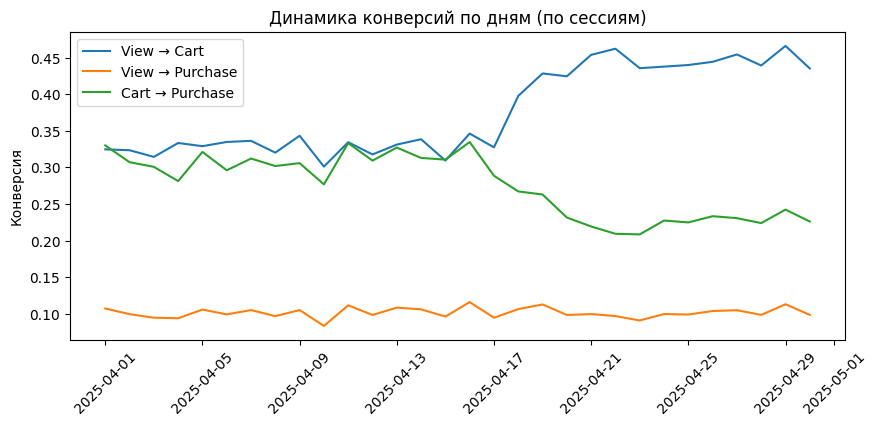

In [60]:
# визуализируем
plt.figure(figsize=(10,4))
plt.plot(daily_conv['date'], daily_conv['view_to_cart'], label='View → Cart')
plt.plot(daily_conv['date'], daily_conv['view_to_purchase'], label='View → Purchase')
plt.plot(daily_conv['date'], daily_conv['cart_to_purchase'], label='Cart → Purchase')
plt.legend()
plt.title('Динамика конверсий по дням (по сессиям)')
plt.ylabel('Конверсия')
plt.xticks(rotation=45)
plt.show()

**Конверсия View → Cart (синяя линия)**
С 1 по 14 апреля показатель держится примерно на уровне 0.32–0.34.
Начиная с 15 апреля заметен рост — конверсия стала выше 0.4 и держится до конца месяца.
Это может говорить о том, что пользователям стало проще добавлять товары в корзину (возможно, был редизайн карточек или акция).

**Конверсия Cart → Purchase (зелёная линия)**
До ~15 апреля метрика стабильна (около 0.30–0.32).
С середины апреля начинается устойчивое падение — опускается до 0.20–0.22 и не восстанавливается.
Это выглядит как основной баг/проблема: пользователи доходят до корзины, но реже завершают покупку.

**Конверсия View → Purchase (оранжевая линия)**
Метрика низкая (около 0.1) и остаётся стабильной

#### **2. Проверка абсолютных и средних значений — 1 балл**

1) Постройте графики дневной динамики абсолютных значений, из которых рассчитаны конверсии выше.
2) Рассчитайте и визуализируйте среднее число событий (именно событий, не сессий), из которых рассчитаны конверсии, на пользователя.
3) На каком этапе воронки появилась проблема?

In [ ]:
# your code is here

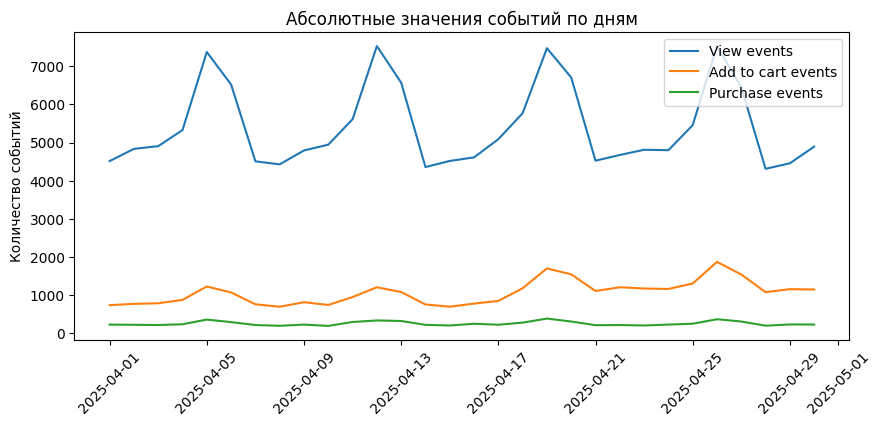

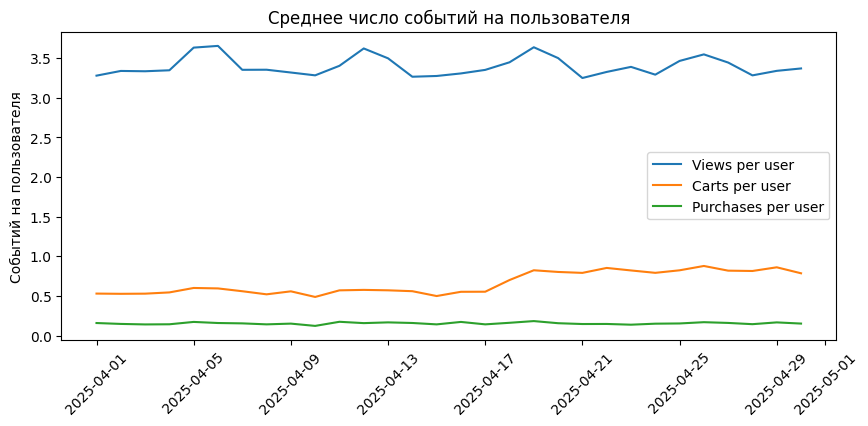

In [86]:
# посчитаем абсолютные события по дням
daily_events = df_filt.groupby(['date','event']).size().unstack(fill_value=0).reset_index()
daily_events = daily_events.rename(columns={
    'view_item': 'views',
    'add_to_cart': 'carts',
    'purchase': 'purchases'
})

# визуализируем абсолютные значения
plt.figure(figsize=(10,4))
plt.plot(daily_events['date'], daily_events['views'], label='View events')
plt.plot(daily_events['date'], daily_events['carts'], label='Add to cart events')
plt.plot(daily_events['date'], daily_events['purchases'], label='Purchase events')
plt.legend()
plt.title('Абсолютные значения событий по дням')
plt.ylabel('Количество событий')
plt.xticks(rotation=45)
plt.show()


# считаем события на пользователя (по дням и user_id)
user_events = df_filt.groupby(['date','user_id','event']).size().unstack(fill_value=0).reset_index()

# агрегируем среднее на пользователя
daily_user_avg = user_events.groupby('date')[['view_item','add_to_cart','purchase']].mean().reset_index()
daily_user_avg = daily_user_avg.rename(columns={
    'view_item': 'views_per_user',
    'add_to_cart': 'carts_per_user',
    'purchase': 'purchases_per_user'
})

# визуализируем среднее на пользователя
plt.figure(figsize=(10,4))
plt.plot(daily_user_avg['date'], daily_user_avg['views_per_user'], label='Views per user')
plt.plot(daily_user_avg['date'], daily_user_avg['carts_per_user'], label='Carts per user')
plt.plot(daily_user_avg['date'], daily_user_avg['purchases_per_user'], label='Purchases per user')
plt.legend()
plt.title('Среднее число событий на пользователя')
plt.ylabel('Событий на пользователя')
plt.xticks(rotation=45)
plt.show()



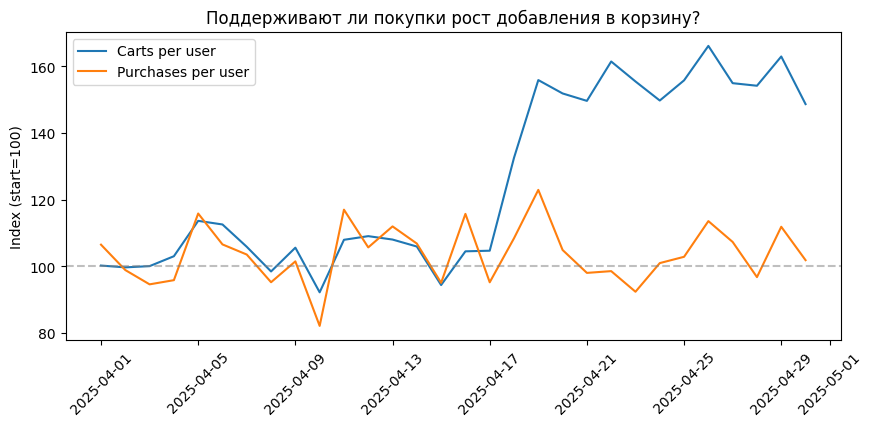

In [90]:
# посмотрим детальнее на добавление в корзину и пкупки
# делаем индексы (=100 в начале периода)
base = daily_user_avg.head(3)[['carts_per_user','purchases_per_user']].mean()
daily_user_avg['carts_idx'] = daily_user_avg['carts_per_user'] / base['carts_per_user'] * 100
daily_user_avg['purchases_idx'] = daily_user_avg['purchases_per_user'] / base['purchases_per_user'] * 100

# визуализируем
plt.figure(figsize=(10,4))
plt.plot(daily_user_avg['date'], daily_user_avg['carts_idx'], label='Carts per user')
plt.plot(daily_user_avg['date'], daily_user_avg['purchases_idx'], label='Purchases per user')
plt.axhline(100, ls='--', color='gray', alpha=0.5)
plt.legend()
plt.title('Поддерживают ли покупки рост добавления в корзину?')
plt.ylabel('Index (start=100)')
plt.xticks(rotation=45)
plt.show()

По графикам видно, что после середины апреля количество добавлений в корзину на пользователя значительно выросло (индекс превышает 150–160 к концу месяца). Однако покупки на пользователя не поддержали этот рост: их индекс остаётся около базового уровня (100) и даже местами уходит ниже. Это означает, что рост активности на этапе «добавление в корзину» не конвертируется в финальные заказы. Проблема локализуется на последнем шаге воронки — при переходе от корзины к покупке.

#### **3. Базовые срезы — 1 балл**
1. Постройте динамику проблемного события в разрезе:
- платформ,
- регионов,
- источников трафика,
- категорий товаров.

2. Есть ли выделяющийся срез?

*В этом пункте в качестве события продолжаем смотреть метрику среднего на пользователя*

In [ ]:
# your code is here

In [91]:
def plot_avg_per_user(df, segment_col, event_name='purchase', cols=2):
    # посчитаем среднее число событий на пользователя по дням и срезу
    tmp = (df.groupby(['date', segment_col, 'user_id', 'event'])
             .size().unstack(fill_value=0).reset_index())
    if event_name not in tmp.columns:
        tmp[event_name] = 0
    daily = (tmp.groupby(['date', segment_col])[event_name]
               .mean().reset_index().sort_values('date'))

    # сетка подграфиков
    segments = daily[segment_col].unique().tolist()
    n = len(segments)
    rows = int(np.ceil(n / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows), sharex=True, sharey=True)
    axes = np.atleast_2d(axes).reshape(rows, cols)

    colors = plt.cm.tab10(np.linspace(0, 1, n))

    for i, seg in enumerate(segments):
        r, c = divmod(i, cols)
        ax = axes[r, c]
        d = daily[daily[segment_col] == seg]
        ax.plot(d['date'], d[event_name], lw=2, color=colors[i])
        ax.set_title(str(seg))
        ax.grid(alpha=0.2)
        if r == rows-1:
            ax.tick_params(axis='x', rotation=45)
        if c == 0:
            ax.set_ylabel('Событий на пользователя')

    for j in range(n, rows*cols):
        fig.delaxes(axes.flatten()[j])

    fig.suptitle(f'{event_name} per user — {segment_col}', fontsize=13)
    plt.tight_layout()
    plt.show()


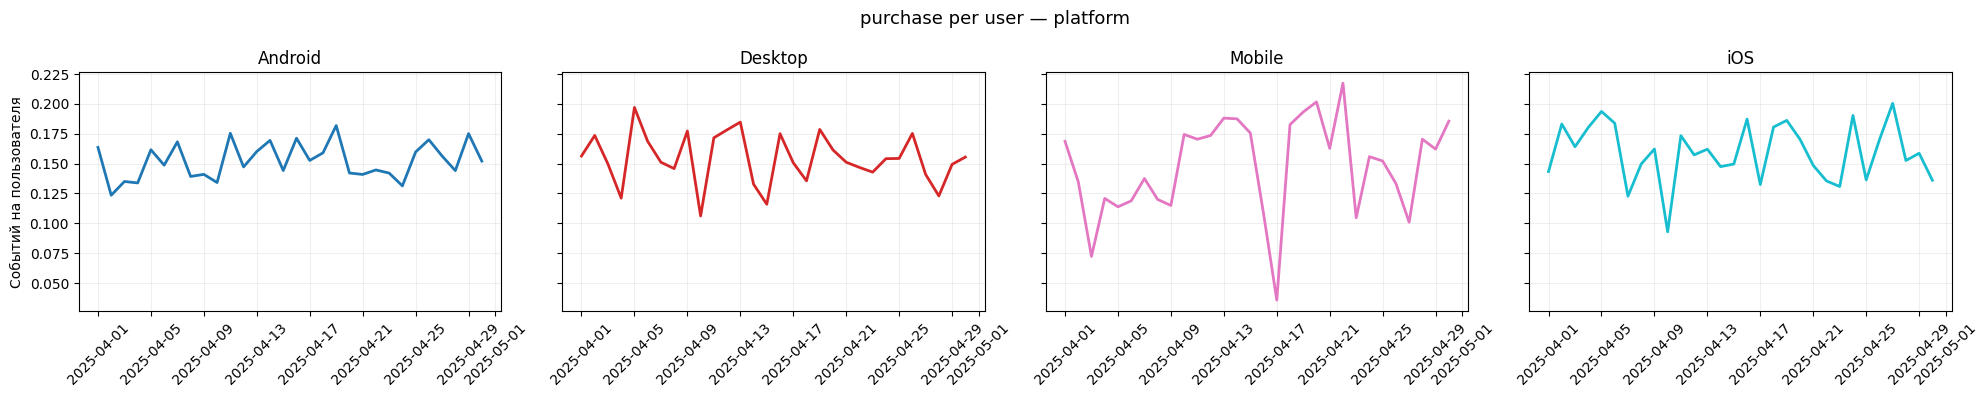

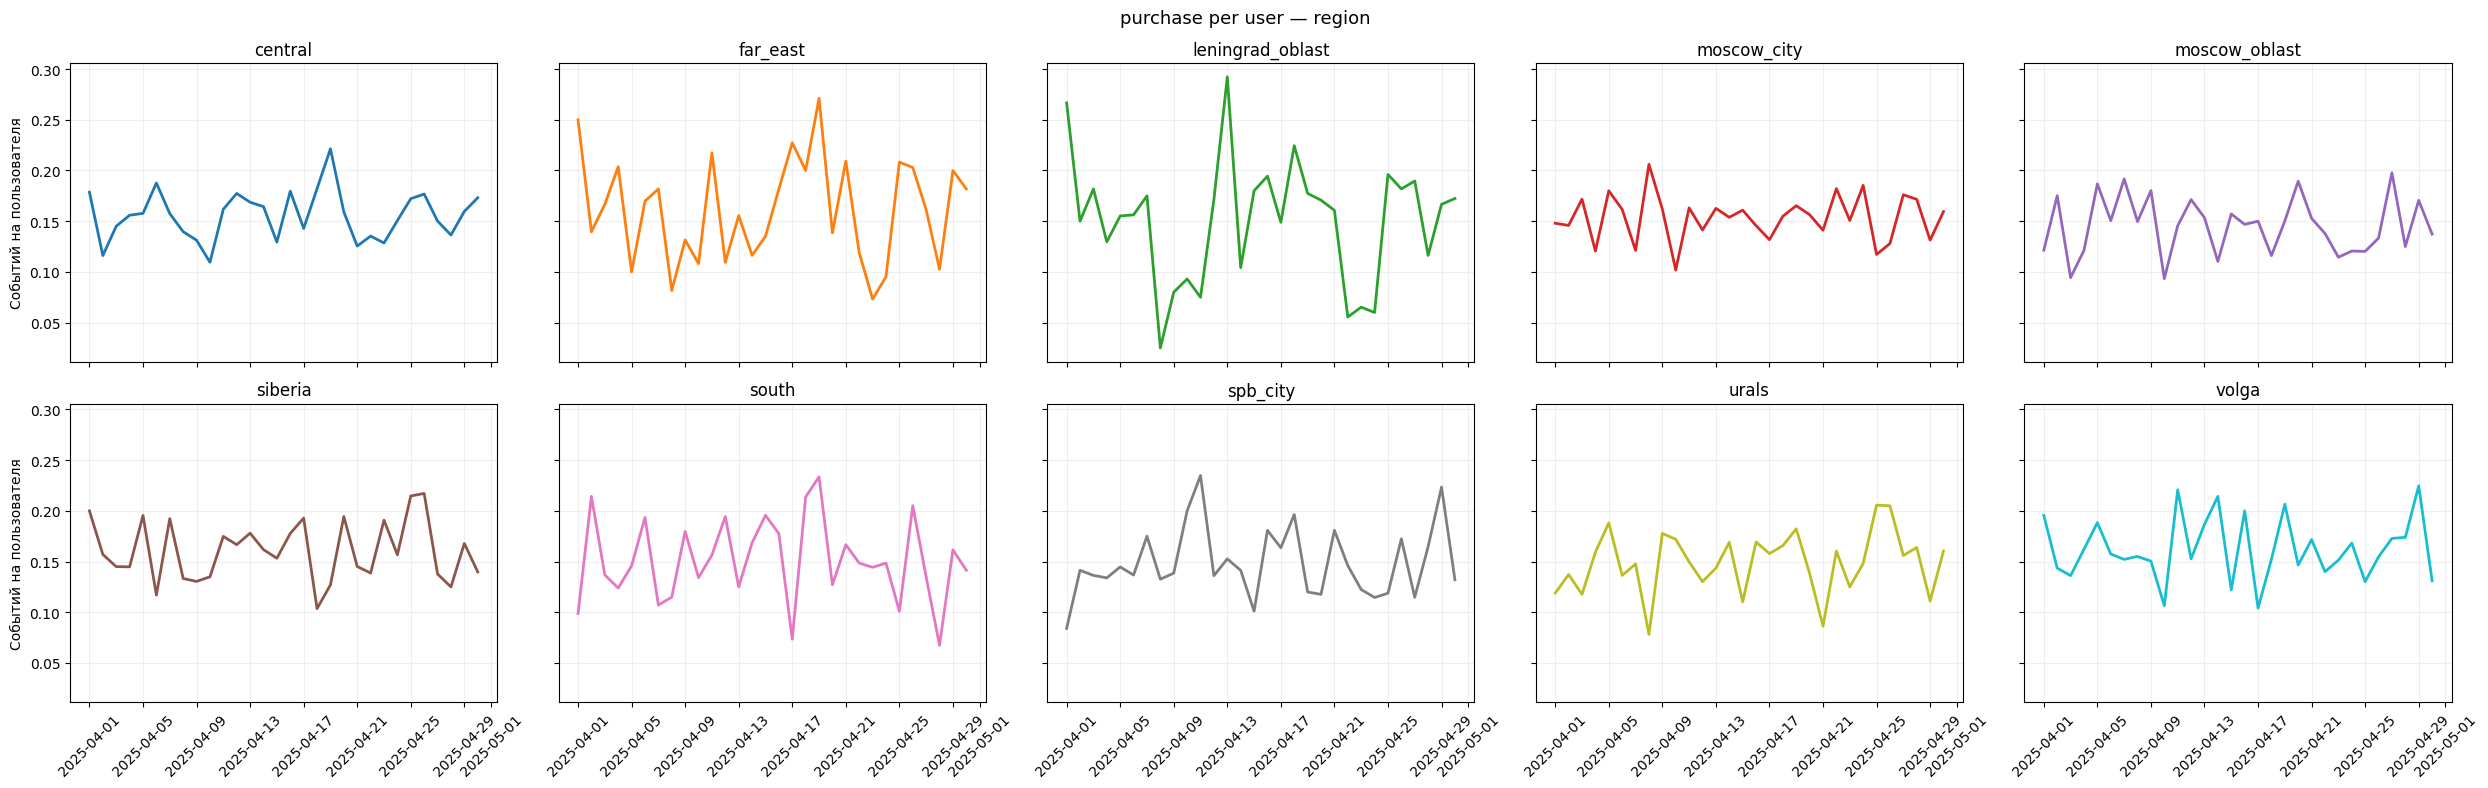

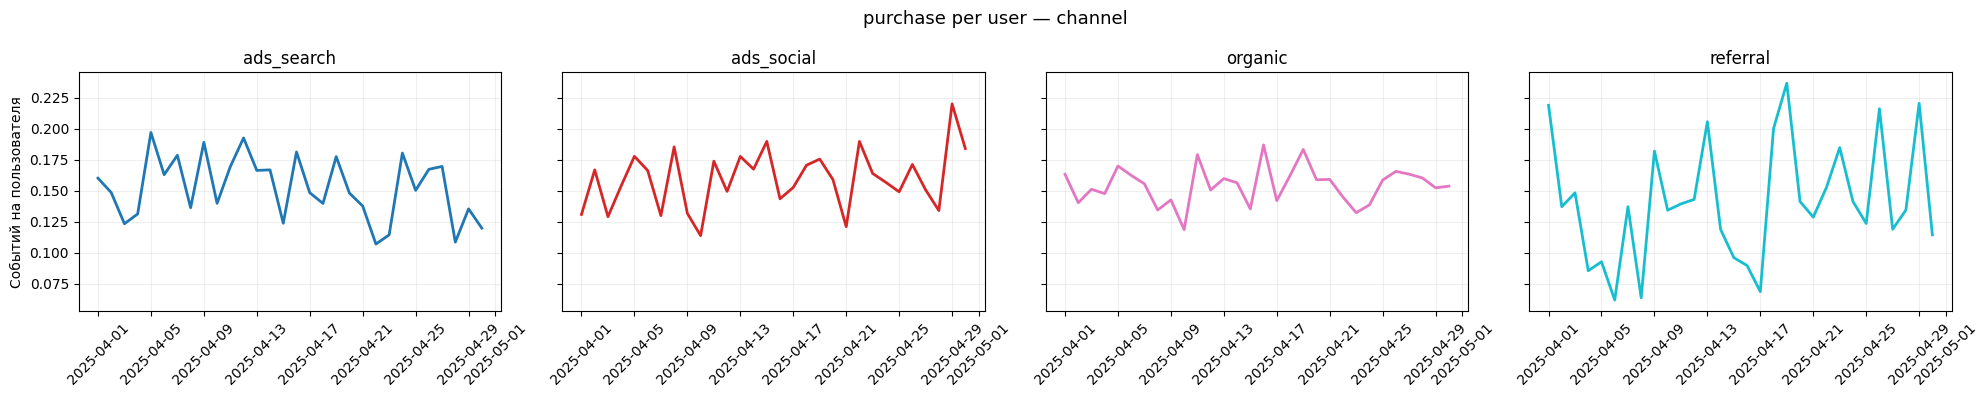

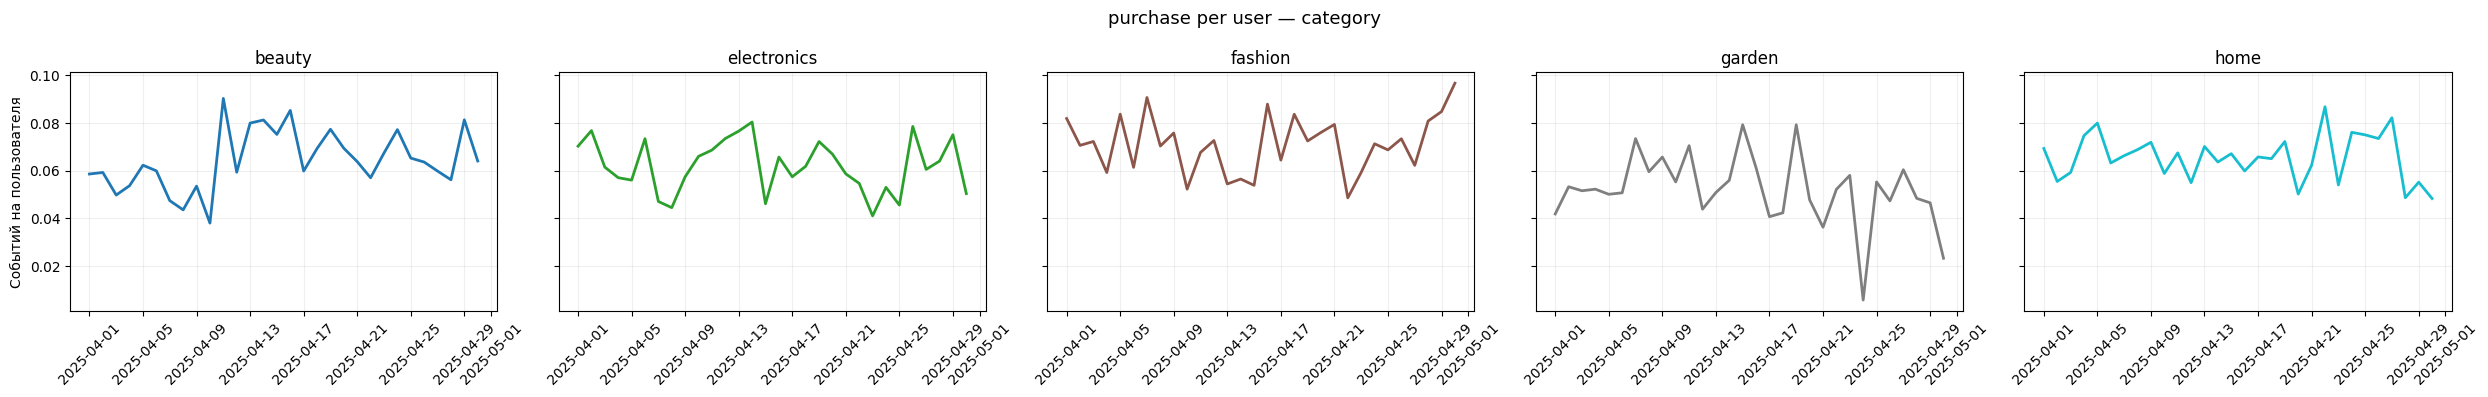

In [92]:
# платформы
plot_avg_per_user(df_filt, 'platform', 'purchase', cols=4)

# регионы
plot_avg_per_user(df_filt, 'region',   'purchase', cols=5)

# источники трафика
plot_avg_per_user(df_filt, 'channel',  'purchase', cols=4)

# категории
plot_avg_per_user(df_filt, 'category', 'purchase', cols=5)

**Платформы:** сильного явного выделения нет, колебания похожи. Иногда выбивается Mobile, но тренд общий.

**Регионы:** много шума, но тоже нет ярко выраженного падения только в одном регионе.

**Каналы:** органика и рекламные каналы ведут себя похоже, а вот referral выглядит нестабильно и сильно проседает в середине апреля.

**Категории:** выделяется категория garden — начиная с середины апреля у неё заметное падение покупок на пользователя.

#### **4. Детальные срезы — 1 балл**
1. Постройте динамику события для iOS и Android с разложением по версиям приложения.
2. Помогло ли это локализовать проблему?

*В этом пункте в качестве события продолжаем смотреть метрику среднего на пользователя*

In [ ]:
# your code is here

In [95]:
base_events = ['view_item','add_to_cart','purchase']
def plot_avg_per_user_by_version(df, platform, event_name='purchase', cols=3):
    # отфильтруем только нужную платформу
    tmp = (df[(df['platform']==platform) & (df['event'].isin(base_events))]
             .groupby(['date','app_version','user_id','event'])
             .size().unstack(fill_value=0).reset_index())
    if event_name not in tmp.columns:
        tmp[event_name] = 0

    # среднее на пользователя по дате и версии
    daily = (tmp.groupby(['date','app_version'])[event_name]
               .mean().reset_index().sort_values('date'))

    versions = daily['app_version'].unique().tolist()
    n = len(versions)
    rows = int(np.ceil(n / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows), sharex=True, sharey=True)
    axes = np.atleast_2d(axes).reshape(rows, cols)

    colors = plt.cm.tab10(np.linspace(0, 1, n))
    for i, ver in enumerate(versions):
        r, c = divmod(i, cols)
        ax = axes[r, c]
        d = daily[daily['app_version'] == ver]
        ax.plot(d['date'], d[event_name], lw=2, color=colors[i])
        ax.set_title(f'v{ver}')
        ax.grid(alpha=0.2)
        if r == rows-1:
            ax.tick_params(axis='x', rotation=45)
        if c == 0:
            ax.set_ylabel('Событий на пользователя')

    for j in range(n, rows*cols):
        fig.delaxes(axes.flatten()[j])

    fig.suptitle(f'{event_name} per user — {platform} by app_version', fontsize=13)
    plt.tight_layout()
    plt.show()


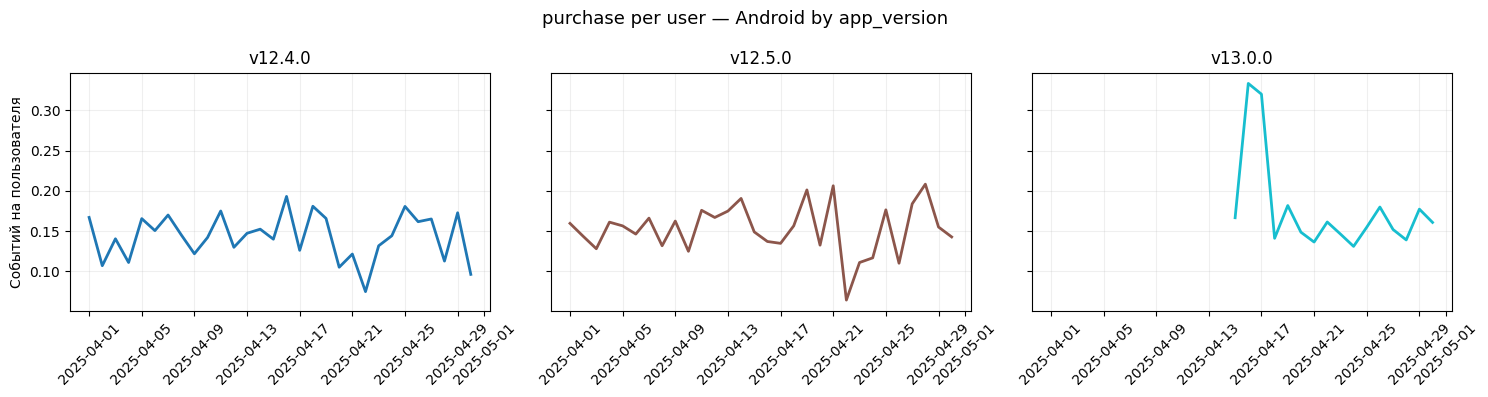

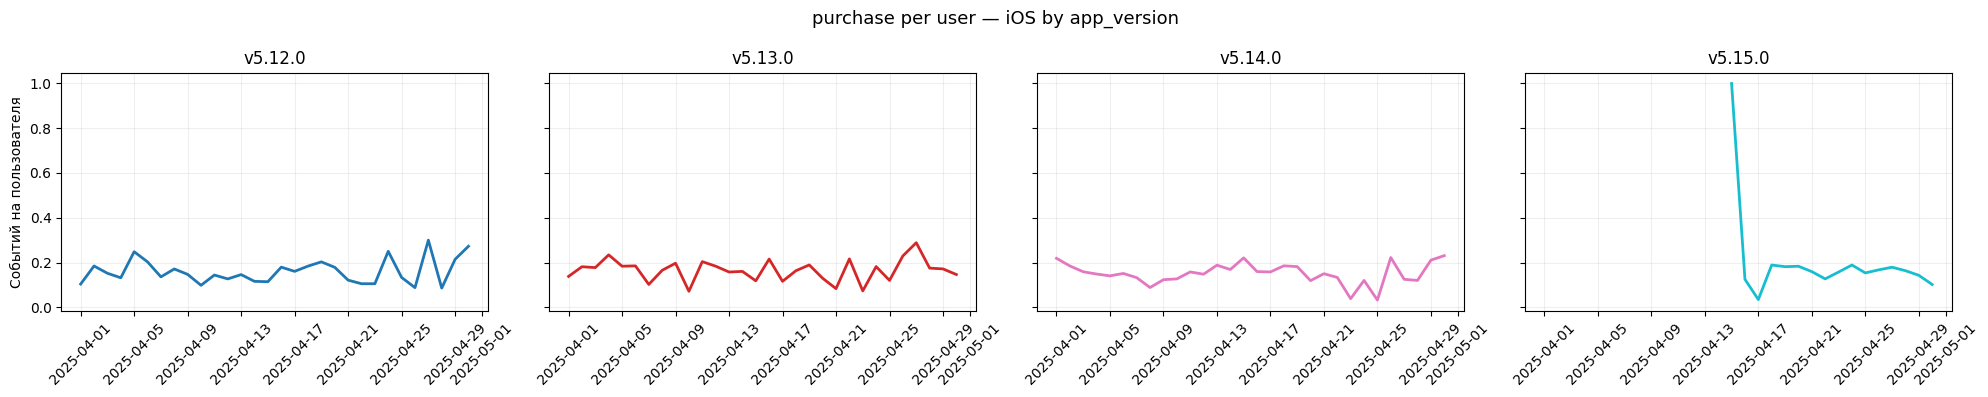

In [96]:
# Android
plot_avg_per_user_by_version(df_filt, 'Android', cols=3)

# iOS
plot_avg_per_user_by_version(df_filt, 'iOS', cols=4)

На Android стабильная динамика у старых версий (12.4.0, 12.5.0). В новой версии 13.0.0 сразу после выхода наблюдается сильное падение метрики — именно здесь локализуется основная проблема.

На iOS похожая ситуация: версии 5.12.0–5.14.0 ведут себя стабильно, а в 5.15.0 после релиза заметен резкий провал в покупках на пользователя.

Вывод:
Разложение по версиям помогло локализовать проблему: сбой связан с конкретными новыми релизами приложений — Android 13.0.0 и iOS 5.15.0.

#### **5. Поиск причин — 1 балл**
1. Для проблемной платформы постройте динамику ВСЕХ событий в разрезе версий приложения.
2. Сформулируйте гипотезу, что именно могло пойти не так в новом релизе? Может быть, пользователи стали заменять один функционал другим?

*В этом пункте в качестве событий продолжаем смотреть метрику среднего на пользователя*

In [ ]:
# your code is here

In [102]:
def plot_all_events_by_version(df, platform, cols=3):
    all_events = df['event'].unique().tolist()

    tmp = (df[df['platform']==platform]
             .groupby(['date','app_version','user_id','event'])
             .size().unstack(fill_value=0).reset_index())

    daily = (tmp.groupby(['date','app_version'])[all_events]
               .mean().reset_index().sort_values('date'))

    versions = daily['app_version'].unique().tolist()
    n = len(versions)
    rows = int(np.ceil(n / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows), sharex=True)
    axes = np.atleast_2d(axes).reshape(rows, cols)

    for i, ver in enumerate(versions):
        r, c = divmod(i, cols)
        ax = axes[r, c]
        d = daily[daily['app_version']==ver]
        for ev in all_events:
            ax.plot(d['date'], d[ev], label=ev)
        ax.set_title(f'v{ver}')
        ax.grid(alpha=0.2)
        if r == rows-1: ax.tick_params(axis='x', rotation=45)
        if c == 0:      ax.set_ylabel('Событий на пользователя')
        ax.legend(fontsize=7)

    for j in range(n, rows*cols):
        fig.delaxes(axes.flatten()[j])

    fig.suptitle(f'All events per user — {platform} by app_version', fontsize=13)
    plt.tight_layout()
    plt.show()


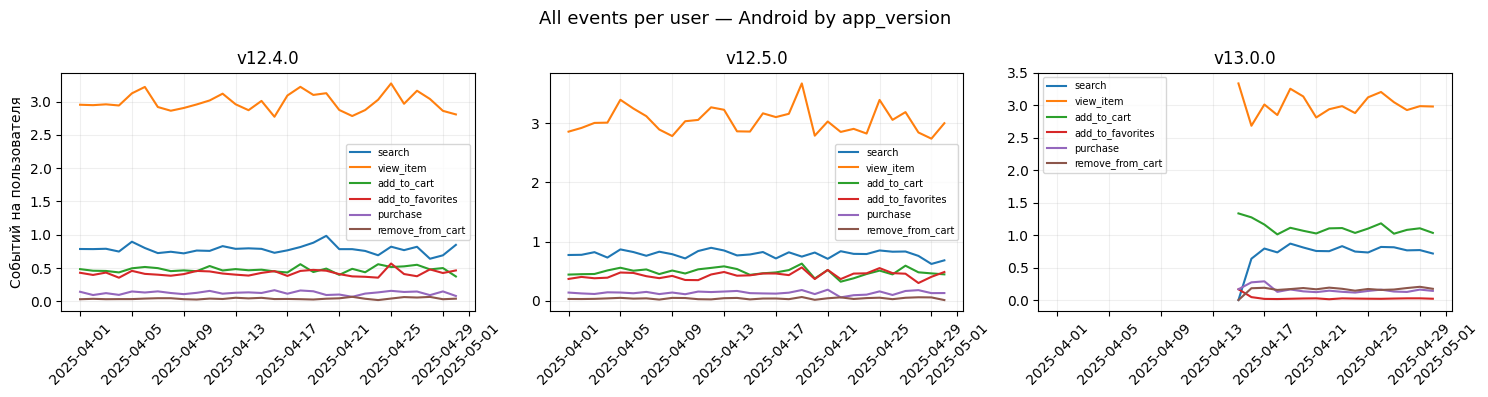

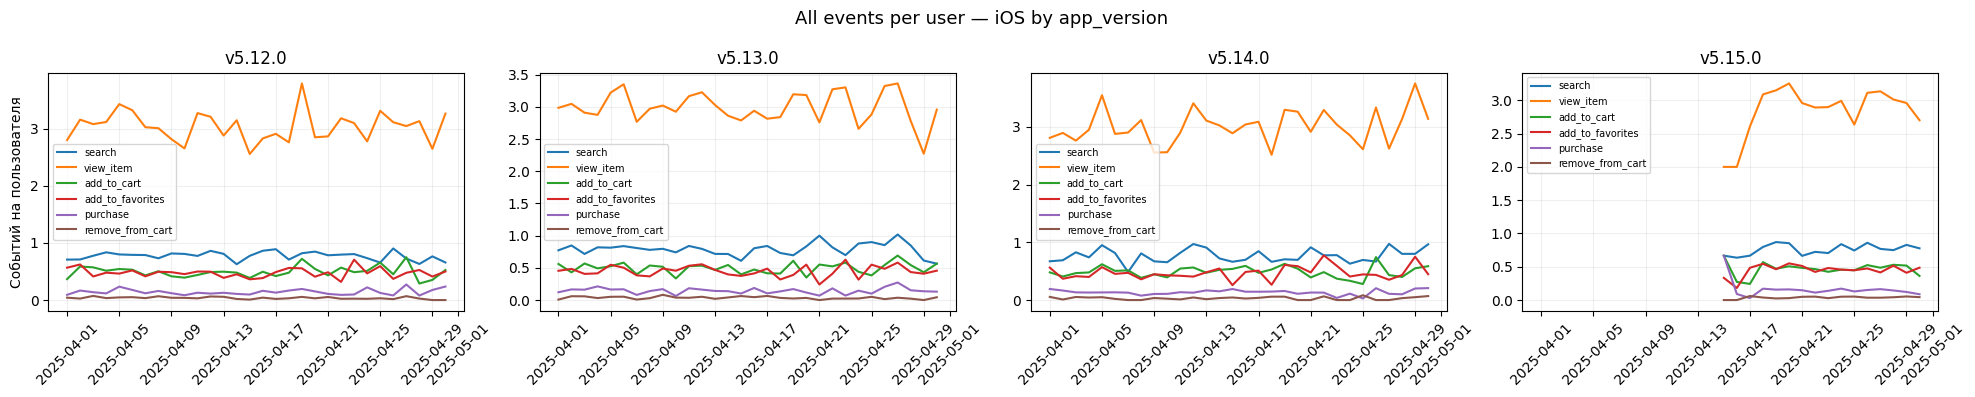

In [103]:
# Android
plot_all_events_by_version(df, 'Android', cols=3)

# iOS
plot_all_events_by_version(df, 'iOS', cols=4)

Возможная гипотеза 🕵️
В новом релизе (Android v13.0.0 и iOS v5.15.0):
ошибка именно на этапе оплаты — пользователи доходят до корзины, но транзакция не проходит;
либо технический баг (кнопка «оплатить» не работает, или др),
либо UX-проблема (новый шаг подтверждения, сломанные платёжные методы).
 При этом рост add_to_cart подтверждает, что пользователи по-прежнему хотят покупать, но не могут завершить оплату.

#### **6. Новости для команды — 1 балл**

На основе проведённого расследования подготовьте сообщение для команды о том, что именно пошло не так.

Мы проанализировали метрики корзины за апрель и выявили проблему:
- После 15 апреля резко упала конверсия из корзины в покупку.
- При этом просмотры товаров и добавления в корзину продолжают расти.
- Детальный анализ по платформам показал, что основной сбой наблюдается в новых версиях приложения:
Android v13.0.0
iOS v5.15.0
- Пользователи активно кладут товары в корзину, но почти не завершают оплату. Это подтверждает, что баг связан именно с процессом покупки (скорее всего, кнопка «Оплатить» или интеграция платёжного сервиса).

Вывод:
Проблема локализована в новых релизах iOS и Android. Необходимо срочно проверить изменения в функционале оформления заказа и платёжном модуле.